In [2]:
girisverisi=np.load("63npy.npy")
cikisverisi=np.load("63npycikis.npy")
print(girisverisi.shape)
print(cikisverisi.shape)


(1260, 224, 224, 3)
(1260, 2)


In [3]:
split63=girisverisi[0:(63*3)]
split63=np.append(split63,girisverisi[(63*10):(63*13)])

split63=np.reshape(split63,(6,224*224*3,63))

yenisplit=np.array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])


print(split63.shape)
print(yenisplit.shape)


(6, 150528, 63)
(6, 2)


In [4]:
trainX=girisverisi[(63*3):(63*10)]
trainX=np.append(trainX,girisverisi[(63*13):(63*20)])


print(trainX.shape)
trainY=np.array([[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])
print(trainY.shape)

trainX = trainX.reshape(14,224*224*3,63)
print(trainX.shape)


(132765696,)
(14, 2)
(14, 150528, 63)


In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

In [6]:
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.layers import Activation,Flatten,Dense,Dropout


print(trainX.shape)
print(trainY.shape)
print(split63.shape)
print(yenisplit.shape)

(14, 150528, 63)
(14, 2)
(6, 150528, 63)
(6, 2)


In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np


data_dim = 63
timesteps = 224*224*3
num_classes = 2

model = Sequential()
model.add(LSTM(64, return_sequences=True,
               input_shape=(timesteps, data_dim))) 
model.add(Dropout(0.2))
model.add(LSTM(63, return_sequences=False)) 
model.add(Dropout(0.2))

model.add(Dense(63, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

history=model.fit(trainX, trainY,
          batch_size=2, epochs=5,
          validation_data=(split63, yenisplit))

model.save("lstmModel") 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150528, 64)        32768     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150528, 64)        0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 63)                32256     
_________________________________________________________________
dropout_2 (Dropout)          (None, 63)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 63)                4032      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 128       
Total params: 69,184
Trainable params: 69,184
Non-trainable params: 0
__________________________________________________

(5,)
[0.55229215 0.3052077  0.17302255 0.23178433 0.05052638]
(5,)
[0.22135593 0.07534399 0.0532627  0.04598937 0.02310311]


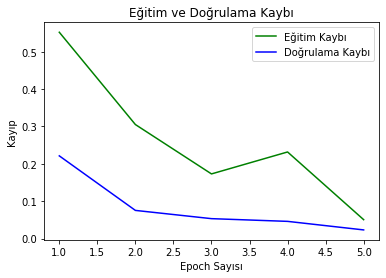

In [24]:
import matplotlib.pyplot as plt
loss_train = np.array([])
loss_val = np.array([])

loss_train = np.append(loss_train, history.history['loss'])
loss_val = np.append(loss_val, history.history['val_loss'])
#loss_val = history.history['val_loss']


epochs = range(1,6)

print(loss_train.shape)
print(loss_train)

print(loss_val.shape)
print(loss_val)

'''loss_ingilizce.png
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

plt.plot(epochs, loss_train, 'g', label='Eğitim Kaybı')
plt.plot(epochs, loss_val, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Kayıp')
plt.legend()
plt.show()





(5,)
[0.78571427 0.85714287 0.85714287 0.9285714  1.        ]


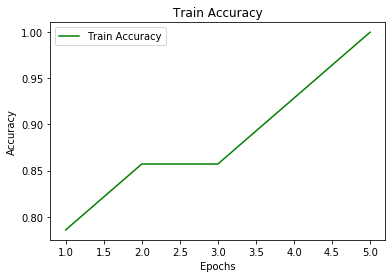

In [29]:
import matplotlib.pyplot as plt

acc_train = np.array([])


acc_train = np.append(acc_train, history.history['accuracy'])




epochs = range(1,6)

print(acc_train.shape)
print(acc_train)



'''
plt.plot(epochs, acc_train, 'g', label='Eğitim Doğruluğu')

plt.title('Eğitim Doğruluğu')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()
'''

plt.plot(epochs, acc_train, 'g', label='Train Accuracy')

plt.title('Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

